In [191]:
%matplotlib inline
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.stats import norm
import pandas as pd
from scipy.stats import linregress

(120, 157, 3)


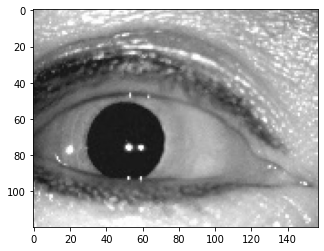

In [170]:
img =  cv2.imread('pupil5.PNG',1)
print(img.shape)
image_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image_gray,(5,5),0)
hist = cv2.calcHist([blurred],[0],None,[256],[0,256])
plt.imshow(img)

No handles with labels found to put in legend.


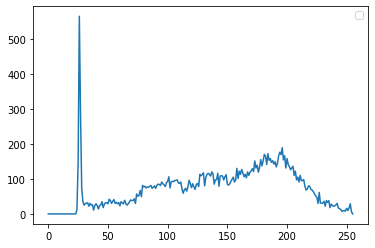

In [171]:
plt.plot(hist)
plt.legend()

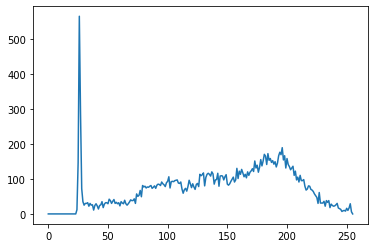

In [172]:
histogram, bins_count = np.histogram(blurred, bins=256, range=(0, 256))
plt.plot(histogram)

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.36942675e-04 8.38641189e-03 3.83227176e-02 5.36093418e-02
 5.74309979e-02 5.92887473e-02 6.06157113e-02 6.22080679e-02
 6.38004246e-02 6.54989384e-02 6.66666667e-02 6.82590234e-02
 6.95859873e-02 7.09660297e-02 7.15498938e-02 7.28237792e-02
 7.43630573e-02 7.55838641e-02 7.63269639e-02 7.76008493e-02
 7.89808917e-02 8.08386412e-02 8.17940552e-02 8.32802548e-02
 8.49787686e-02 8.66772824e-02 8.82165605e-02 9.04458599e-02
 9.24628450e-02 9.40552017e-02 9.59660297e-02 9.81422505e-02
 9.97346072e-02 1.01486200e-01 1.03025478e-01 1.04723992e-01
 1.05944798e-01 1.07802548e-01 1.09447983e-01 1.10987261e-01
 1.13057325e-01 1.145966

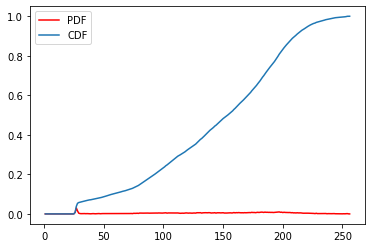

In [207]:
pdf = histogram / sum(histogram)
pdf1 =list(histogram)
cdf = np.cumsum(pdf)
cdf1 = pd.DataFrame(np.cumsum(pdf))
print(cdf)

plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.legend()

11
            0
0.0  0.000000
0.1  0.023355
0.2  0.090446
0.3  0.139570
0.4  0.247877
0.5  0.362128
0.6  0.500796
0.7  0.662288
0.8  0.868737
0.9  0.972903
1.0  1.000000


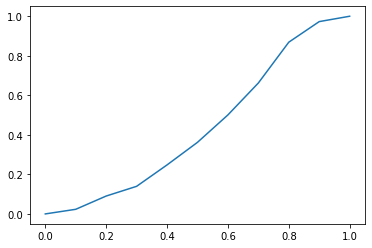

In [208]:
ppf = cdf1.quantile([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0], axis =0)
print(len(ppf))
print(ppf)
plt.plot(ppf)
y = list(ppf)

In [209]:
# Brute Force
# x= [0.023355,0.090446,0.139570,0.247877,0.362128,0.500796,0.662288,0.868737,0.972903,1.000000]

11
[0]


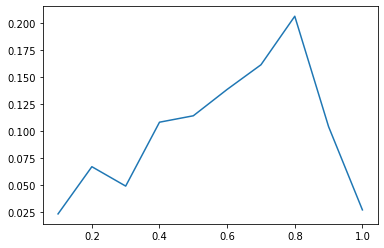

In [204]:
gradient =  ppf.diff()
print(len(gradient))
plt.plot(gradient)
y1=list(gradient)
print(y1)

In [180]:
temp = 0
for i in range(1,len(y1)):
    if(y1[i]>y1[i+1]):
        print(y1[i],i)
        break

On considering the recent three plots, we will can arrive at an optimum global threshold value.( For this particular figure, the threshold lies between 20 percentile and 30 percentile) and this corresponds to a pixel value in the range of 60 to 70.This range performs well in the main algorithm as a good global threshold. Will try to assimilate this section of the adaptive thresholding technique into the main code soon. 